In [1]:
%load_ext aiida
%aiida

/home/daniel/virtualenvs/market_uc3/lib/python3.9/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Loaded AiiDA DB environment - profile name: marketplace_uc3.

In [2]:
from aiida.plugins import  CalculationFactory
from aiida.orm import Dict, Code, SinglefileData
from aiida.engine.launch import run_get_node
import os

In [3]:
# Import the input data files, and store their uuid. 
# if you are executing more than once you can just 
# set the uuid variables manually (see next cell)
sf_cas = SinglefileData(file=os.path.abspath('./example_input/FSP-Lurederra_alumina-start.cas'))
sf_cas.store() 
uuid_casfile = sf_cas.uuid 
print("UUID cas:", uuid_casfile)

sf_dat = SinglefileData(file=os.path.abspath('./example_input/FSP-Lurederra_alumina-start.dat'))
sf_dat.store() 
uuid_datfile = sf_dat.uuid 
print("UUID dat:", uuid_datfile)

UUID cas: 28c1a5eb-ba25-4f96-9dac-52937db589c7
UUID dat: c99baf5e-131c-4114-b24d-799f1f334f7a


In [4]:
#uuid_casfile = "63bc238f-9f0e-445f-a8f6-c554bc3a4fb1"
#uuid_datfile = "2780d8c7-c978-49a7-9ea6-82fbf1e98fba"

In [5]:
fluent_calcjob = CalculationFactory('marketusercase3')

fluentcalc_builder = fluent_calcjob.get_builder()
# ATSBcons          ATSBConcentration
# Precurfr          PreCursorVolumeFlowRate
# Dispfr            DispersionVolumeFlowRate
# Pilotch4fr        PilotMethaneVolumeFlowRate
# Piloto2fr         PilotOxygenVolumeFlowRate
# Fanrate           FanExtractionVolumeFlowRate
user_input = {
    "ATSBcons": 1.94,
    "Precurfr": 40.0,
    "Dispfr": 72.0,
    "Pilotch4fr": 4.0,
    "Piloto2fr": 8.0,
    "Fanrate": 270.0,
}

fluentcalc_builder.user_inputs = Dict(user_input)
fluentcalc_builder.code = Code.get(label='test-model3')
fluentcalc_builder.metadata.dry_run = True
fluentcalc_builder.cas_file = load_node(uuid_casfile)
fluentcalc_builder.dat_file = load_node(uuid_datfile)
print(fluentcalc_builder.metadata)

outnode = run_get_node(fluentcalc_builder)

{'options': {'stash': {}}, 'dry_run': True}


05/19/2022 04:09:40 PM <3930> aiida.scheduler.direct: [WARNING] Physical memory limiting is not supported by the direct scheduler.


In [9]:
fluentcalc_builder.metadata.dry_run = False 
outnode = run_get_node(fluentcalc_builder)
calc_node = outnode[-1]

05/19/2022 04:10:42 PM <3930> aiida.scheduler.direct: [WARNING] Physical memory limiting is not supported by the direct scheduler.


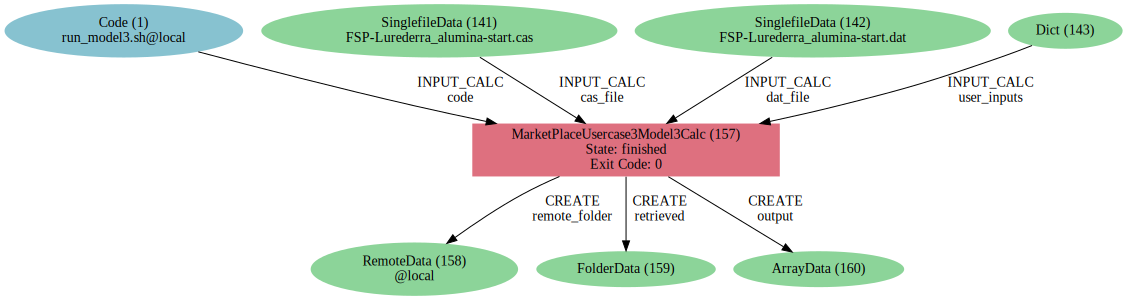

In [10]:
from aiida import orm
from aiida.tools.visualization import Graph
graph = Graph()
graph.add_incoming(calc_node, annotate_links="both")
graph.add_outgoing(calc_node, annotate_links="both")
graph.graphviz